# Import Library

In [57]:
# Melakukan import library-library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import tensorflow as tf
import gdown
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Load Data

In [2]:
# Proses Load Data
url = 'https://drive.google.com/uc?export=download&id=1c6mBIjThJdQ4G6rhafCCnQr77iP6wNub'

gdown.download(url,'data.zip',quiet = False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1c6mBIjThJdQ4G6rhafCCnQr77iP6wNub
To: /content/data.zip
100%|██████████| 162k/162k [00:00<00:00, 70.4MB/s]


'data.zip'

In [3]:
# Mengekstrak seluruh data pada data.zip
with ZipFile('data.zip','r') as zip:
  zip.extractall()

In [4]:
# Mencetak jumlah data setiap file csv
package = pd.read_csv('/content/package_tourism.csv')
rating = pd.read_csv('/content/tourism_rating.csv')
destination = pd.read_csv('/content/tourism_with_id.csv')
user = pd.read_csv('/content/user.csv')

print("Jumlah package destinasi yang ditawarkan:",len(package.Package.unique()))
print("Jumlah rating yang diberikan:",len(rating.User_Id))
print("Jumlah destinasi yang ditawarkan:",len(destination.Place_Id.unique()))
print("Jumlah pengguna :",len(user.User_Id.unique()))

Jumlah package destinasi yang ditawarkan: 100
Jumlah rating yang diberikan: 10000
Jumlah destinasi yang ditawarkan: 437
Jumlah pengguna : 300


# Exploratory Data Analysis (EDA)

## Data Understanding

Pada dataset ini terdiri dari 4 file yaitu sebagai berikut:
- package : merupakan paket-paket destinasi tempat wisata yang ditawarkan dari dari berbagai kota
- rating : merupakan rating yang diberikan user terhadap destinasi tempat wisata
- destination : merupakan destinasi tempat-tempat wisata di 5 kota besar di Indonesia (Jakarta, Bandung, Semarang, Surabaya, Yogyakarta)
- user : merupakan pengguna yang melakukan rating

Variabel rating, destination, dan user akan digunakan pada model rekomendasi. Sedangkan, variabel package hanya untuk melihat data dengan perspektif dalam bentuk paket perjalanan.

### Destination variable

In [5]:
# Mencetak informasi destination
destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [6]:
# Mencetak beberapa data pada destination
destination.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [7]:
# Dari informasi dan tampilan data diatas, terdapat 2 kolom yang tidak relevan
# Melakukan drop pada kolom 'Unnamed: 11', dan 'Unnamed: 12'

destination = destination.drop(columns=['Unnamed: 11','Unnamed: 12'], axis=1)

In [8]:
# Melakukan pengecekan terhadap kolom missing values
destination.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [9]:
# Dikarenakan data yang kosong hampir setengah dari keseluruhan data pada kolom time_minutes
# Maka tidak akan dilakukan drop pada data tersebut, namun imputasi dengan nilai mean

destination['Time_Minutes'] = destination['Time_Minutes'].fillna(destination['Time_Minutes'].mean().round(1))

In [10]:
# Mencetak beberapa data pada destination kembali
destination.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,82.6,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [11]:
# Mengecek missing value kembali
destination.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,0
Coordinate,0
Lat,0


In [12]:
# # Melihat jumlah destinasi yang ditawarkan berdasarkan setiap kota
# destination.groupby('City').Place_Name.count()

### User Variable

In [13]:
# Mencetak informasi user
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [14]:
# Mencetak beberapa data pada user
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


### Rating Variable

In [15]:
# Mencetak informasi rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [16]:
# Mencetak beberapa data pada rating
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [17]:
# Mencetak deskripsi statistik pada data rating
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


Kolom-kolom rating antara lain:

- User_Id, merupakan identitas pengguna.
- Place_Id, merupakan identitas destinasi tempat wisata.
- Place_Ratings, merupakan data rating untuk destinasi tempat wisata.

Dari data diatas juga didapatkan bahwa rating pada destinasi tempat wisata memiliki rentang 1-5


## Univariate dan Multivariate Analysis

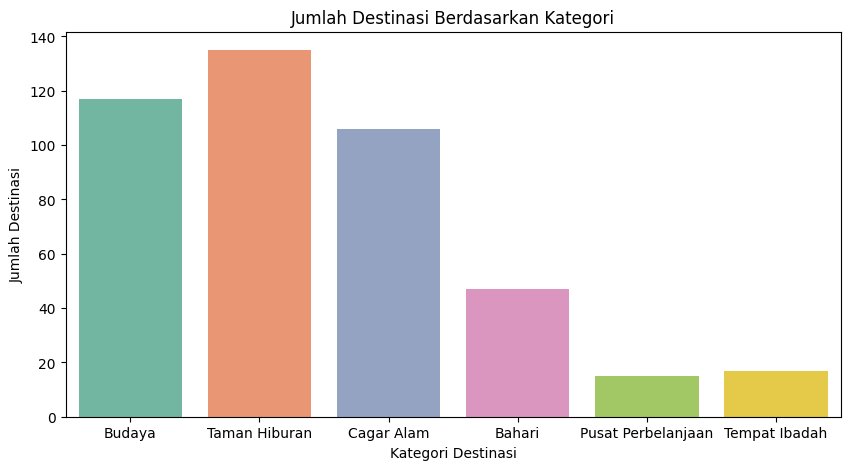

In [18]:
# Visualisasi destination yang ditawarkan berdasarkan kategorinya
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=destination, palette='Set2', hue='Category')
plt.xlabel('Kategori Destinasi')
plt.ylabel('Jumlah Destinasi')
plt.title('Jumlah Destinasi Berdasarkan Kategori')
plt.show()

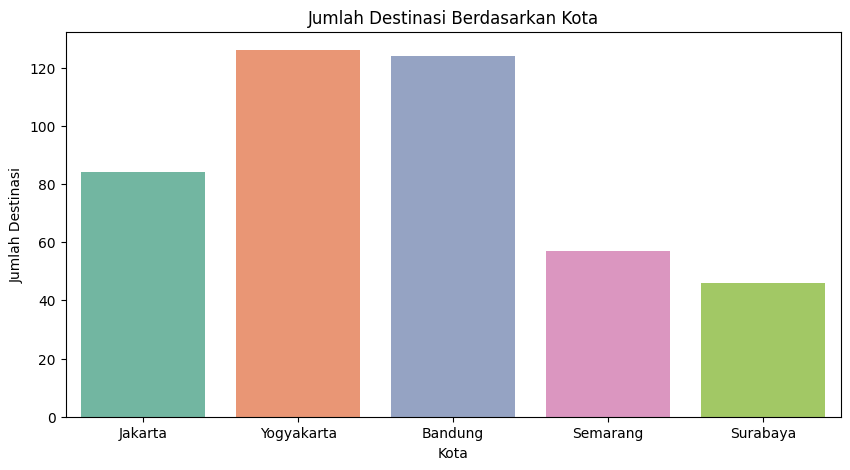

In [19]:
# Visualisasi destination yang ditawarkan berdasarkan setiap kota
plt.figure(figsize=(10,5))
sns.countplot(x='City',data=destination, palette='Set2', hue='City')
plt.xlabel('Kota')
plt.ylabel('Jumlah Destinasi')
plt.title('Jumlah Destinasi Berdasarkan Kota')
plt.show()

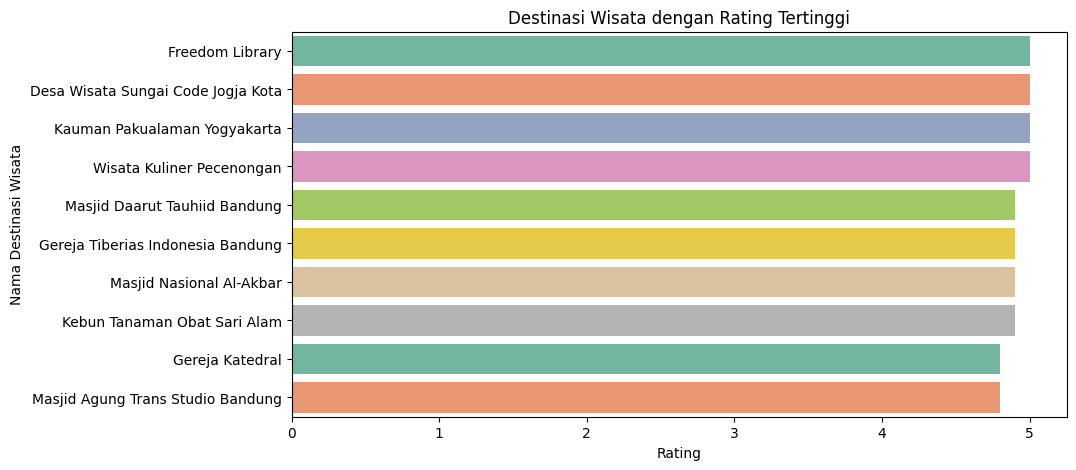

In [20]:
# Visualisasi destination dengan rating tertinggi (10 data)
top_ten_destination = destination.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Place_Name',data=top_ten_destination, palette='Set2', hue='Place_Name')
plt.xlabel('Rating')
plt.ylabel('Nama Destinasi Wisata')
plt.title('Destinasi Wisata dengan Rating Tertinggi')
plt.show()


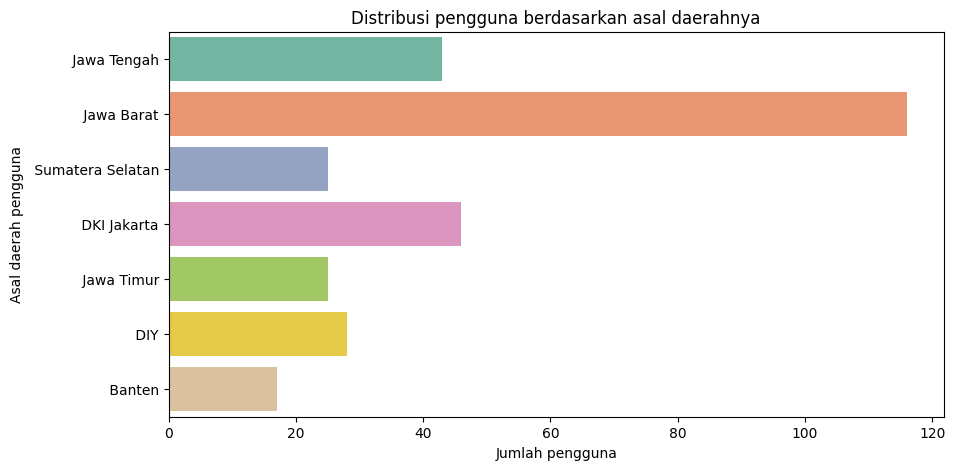

In [21]:
# Visualisasi asal daerah pengguna
asal_daerah_user = user['Location'].apply(lambda x: x.split(',')[1])

plt.figure(figsize=(10,5))
sns.countplot(y=asal_daerah_user, palette='Set2', hue=asal_daerah_user)
plt.xlabel('Jumlah pengguna')
plt.ylabel('Asal daerah pengguna')
plt.title('Distribusi pengguna berdasarkan asal daerahnya')
plt.show()

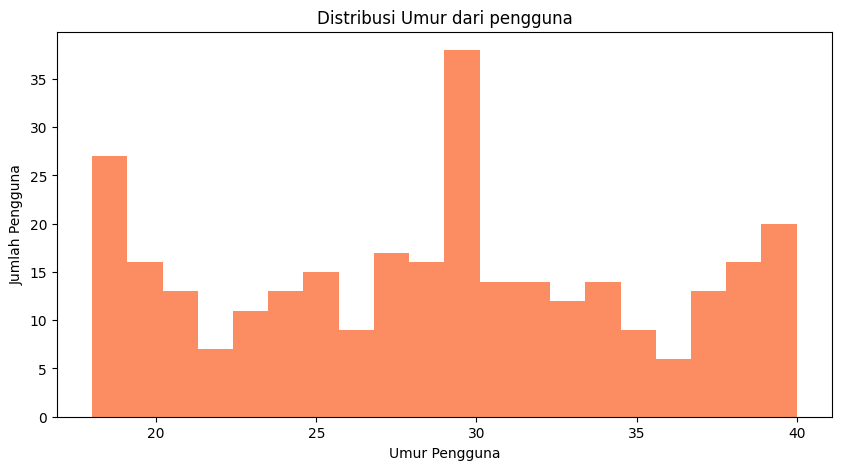

In [22]:
# Visualisasi distribusi umur pengguna
plt.figure(figsize=(10, 5))
plt.hist(user['Age'], bins=20, color='#fc8d62')
plt.xlabel('Umur Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Umur dari pengguna')
plt.show()

# Data Preprocessing

### Mengetahui Jumlah Rating Destinasi

In [23]:
# Menggabungkan dataframe rating dengan destinasi berdasarkan nilai Place_Id
rating_destination = pd.merge(rating, destination, on='Place_Id', how='left')
rating_destination

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1,82.6,"{'lat': -6.948877, 'lng': 110.3893285}",-6.948877,110.389329
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,60.0,"{'lat': -7.264598899999997, 'lng': 110.4046017}",-7.264599,110.404602
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,82.6,"{'lat': -7.792189999999999, 'lng': 110.362151}",-7.792190,110.362151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,82.6,"{'lat': -7.247796300000002, 'lng': 112.7998235}",-7.247796,112.799824
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,45.0,"{'lat': -6.204630300000001, 'lng': 106.8365324}",-6.204630,106.836532
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,150.0,"{'lat': -6.829411199999999, 'lng': 107.6874666}",-6.829411,107.687467
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,82.6,"{'lat': -6.925963500000001, 'lng': 107.6354278}",-6.925963,107.635428


In [24]:
# Cek missing value dengan fungsi isnull()
rating_destination.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,0


In [25]:
# Menghitung jumlah rating dan jumlah pengguna melakukan rating pada destinasi
rating_destination.groupby('Place_Id').agg({'Place_Ratings':'sum', 'Place_Name':'count'})

,Place_Ratings,Place_Name
Place_Id,,
1,67,18
2,71,25
3,48,19
4,60,21
5,88,25
...,...,...
433,76,23
434,60,25
435,51,17


### Menggabungkan data rating dengan fitur nama destinasi, kategori, kota, harga, lama kunjungan, dan rating tempat

In [26]:
# Definisikan dataframe rating ke dalam variabel all_destination_rate
all_destination_rate = rating
all_destination_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [27]:
# Menggabungkan semua fitur yang dibutuhkan kedalam dataframe all_destination_rate
all_destination = pd.merge(all_destination_rate, destination[['Place_Id','Price','Time_Minutes','Rating','Category','City','Place_Name']], on='Place_Id', how='left')
all_destination

,User_Id,Place_Id,Place_Ratings,Price,Time_Minutes,Rating,Category,City,Place_Name
0,1,179,3,75000,90.0,4.6,Budaya,Yogyakarta,Candi Ratu Boko
1,1,344,2,3000,82.6,4.1,Bahari,Semarang,Pantai Marina
2,1,5,5,94000,60.0,4.5,Taman Hiburan,Jakarta,Atlantis Water Adventure
3,1,373,3,10000,60.0,4.5,Budaya,Semarang,Museum Kereta Ambarawa
4,1,101,4,0,82.6,4.0,Budaya,Yogyakarta,Kampung Wisata Sosro Menduran
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,35000,82.6,4.1,Taman Hiburan,Surabaya,Waterpark Kenjeran Surabaya
9996,300,64,4,2000,45.0,4.7,Budaya,Jakarta,Museum Sasmita Loka Ahmad Yani
9997,300,311,3,25000,150.0,4.3,Cagar Alam,Bandung,The Lodge Maribaya
9998,300,279,4,0,82.6,4.8,Tempat Ibadah,Bandung,Masjid Agung Trans Studio Bandung


# Data Preparation

In [28]:
# Mengecek missing value pada dataframe all_destination
all_destination.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Price,0
Time_Minutes,0
Rating,0
Category,0
City,0
Place_Name,0


### Pengecekan fitur-fitur kategorikal

In [29]:
# Mengurutkan destinasi berdasarkan Place_Id kemudian memasukkannya ke dalam variabel fix_destinasi
fix_destination = all_destination.sort_values('Place_Id', ascending=True)
fix_destination

,User_Id,Place_Id,Place_Ratings,Price,Time_Minutes,Rating,Category,City,Place_Name
6236,187,1,4,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
5348,162,1,5,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
5610,169,1,5,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
2089,64,1,2,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
5231,159,1,1,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
...,...,...,...,...,...,...,...,...,...
8710,263,437,5,10000,82.6,4.8,Tempat Ibadah,Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
6209,187,437,5,10000,82.6,4.8,Tempat Ibadah,Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
7082,213,437,4,10000,82.6,4.8,Tempat Ibadah,Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
6041,182,437,1,10000,82.6,4.8,Tempat Ibadah,Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya


In [30]:
# Mengecek berapa jumlah fix_destinastion
len(fix_destination.Place_Id.unique())

437

In [31]:
# Mengecek kategori 'Category' yang unik
fix_destination.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [32]:
# Mengubah nilai category dengan penulisan Snake Case
fix_destination['Category'] = fix_destination['Category'].str.replace(' ','_')
fix_destination.Category.unique()

array(['Budaya', 'Taman_Hiburan', 'Cagar_Alam', 'Bahari',
       'Pusat_Perbelanjaan', 'Tempat_Ibadah'], dtype=object)

In [33]:
# Mengecek kategori 'City' yang unik
fix_destination.City.unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

Dari pengecekan diatas, tidak terdapat kategori yang aneh dan pada analisis setiap fitur sebelumnya di EDA tidak ada kategori yang memiliki nilai yang sedikit sehingga Data telah bersih

# Model Development

### Melakukan Konsolidasi Data

In [34]:
# Melakukan groupping dengan 'Place_Id' dan rata-rata Place_Ratings setiap Place_Id
consolidated_destination = fix_destination.groupby('Place_Id').agg({
    'Place_Ratings':'mean',  # jumlah rating yang dilakukan setiap pengguna
    'Price':'first',  # harga sama setiap Place_id
    'Time_Minutes':'first',  # lama kunjungan sama setiap Place_id
    'Rating':'first',  # rating sama setiap Place_id
    'Category':'first',  # kategori sama setiap Place_id
    'City':'first',  # kota sama setiap Place_id
    'Place_Name':'first',  # nama destinasi sama setiap Place_id
}).reset_index()
consolidated_destination

,Place_Id,Place_Ratings,Price,Time_Minutes,Rating,Category,City,Place_Name
0,1,3.722222,20000,15.0,4.6,Budaya,Jakarta,Monumen Nasional
1,2,2.840000,0,90.0,4.6,Budaya,Jakarta,Kota Tua
2,3,2.526316,270000,360.0,4.6,Taman_Hiburan,Jakarta,Dunia Fantasi
3,4,2.857143,10000,82.6,4.5,Taman_Hiburan,Jakarta,Taman Mini Indonesia Indah (TMII)
4,5,3.520000,94000,60.0,4.5,Taman_Hiburan,Jakarta,Atlantis Water Adventure
...,...,...,...,...,...,...,...,...
432,433,3.304348,2000,45.0,4.4,Budaya,Surabaya,Museum Mpu Tantular
433,434,2.400000,0,82.6,4.6,Taman_Hiburan,Surabaya,Taman Bungkul
434,435,3.000000,0,45.0,4.4,Taman_Hiburan,Surabaya,Taman Air Mancur Menari Kenjeran
435,436,3.090909,0,82.6,4.6,Taman_Hiburan,Surabaya,Taman Flora Bratang Surabaya


In [35]:
# Menggabungkan fitur category dan city lalu drop kedua fitur tersebut
consolidated_destination['Category_City'] = consolidated_destination['Category'] + '_' + consolidated_destination['City']
consolidated_destination = consolidated_destination.drop(columns=['Category','City'])
consolidated_destination

,Place_Id,Place_Ratings,Price,Time_Minutes,Rating,Place_Name,Category_City
0,1,3.722222,20000,15.0,4.6,Monumen Nasional,Budaya_Jakarta
1,2,2.840000,0,90.0,4.6,Kota Tua,Budaya_Jakarta
2,3,2.526316,270000,360.0,4.6,Dunia Fantasi,Taman_Hiburan_Jakarta
3,4,2.857143,10000,82.6,4.5,Taman Mini Indonesia Indah (TMII),Taman_Hiburan_Jakarta
4,5,3.520000,94000,60.0,4.5,Atlantis Water Adventure,Taman_Hiburan_Jakarta
...,...,...,...,...,...,...,...
432,433,3.304348,2000,45.0,4.4,Museum Mpu Tantular,Budaya_Surabaya
433,434,2.400000,0,82.6,4.6,Taman Bungkul,Taman_Hiburan_Surabaya
434,435,3.000000,0,45.0,4.4,Taman Air Mancur Menari Kenjeran,Taman_Hiburan_Surabaya
435,436,3.090909,0,82.6,4.6,Taman Flora Bratang Surabaya,Taman_Hiburan_Surabaya


### Mengkonversi fitur-fitur kedalam list

In [36]:
# Mengonversi data series ‘Place_Id’ menjadi dalam bentuk list
destination_id = consolidated_destination['Place_Id'].tolist()

# Mengonversi data series ‘Place_Name’ menjadi dalam bentuk list
destination_name = consolidated_destination['Place_Name'].tolist()

# Mengonversi data series ‘Category_City’ menjadi dalam bentuk list
destination_category_city = consolidated_destination['Category_City'].tolist()

# Mengonversi data series ‘Price’ menjadi dalam bentuk list
destination_price = consolidated_destination['Price'].tolist()

# Mengonversi data series ‘Time_Minutes’ menjadi dalam bentuk list
destination_tm = consolidated_destination['Time_Minutes'].tolist()

# Mengonversi data series ‘Rating’ menjadi dalam bentuk list
destination_rating = consolidated_destination['Rating'].tolist()

print(len(destination_id))
print(len(destination_name))
print(len(destination_category_city))
print(len(destination_price))
print(len(destination_tm))
print(len(destination_rating))

437
437
437
437
437
437


In [37]:
# Membuat dictionary destination
destination_new = pd.DataFrame({
    'id': destination_id,
    'name': destination_name,
    'category_city': destination_category_city,
    'price': destination_price,
    'time_minutes': destination_tm,
    'rating': destination_rating
})
destination_new

,id,name,category_city,price,time_minutes,rating
0,1,Monumen Nasional,Budaya_Jakarta,20000,15.0,4.6
1,2,Kota Tua,Budaya_Jakarta,0,90.0,4.6
2,3,Dunia Fantasi,Taman_Hiburan_Jakarta,270000,360.0,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman_Hiburan_Jakarta,10000,82.6,4.5
4,5,Atlantis Water Adventure,Taman_Hiburan_Jakarta,94000,60.0,4.5
...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya_Surabaya,2000,45.0,4.4
433,434,Taman Bungkul,Taman_Hiburan_Surabaya,0,82.6,4.6
434,435,Taman Air Mancur Menari Kenjeran,Taman_Hiburan_Surabaya,0,45.0,4.4
435,436,Taman Flora Bratang Surabaya,Taman_Hiburan_Surabaya,0,82.6,4.6


## Content-Based Filtering

In [38]:
data = destination_new
data.sample(5)

,id,name,category_city,price,time_minutes,rating
62,63,Museum Kebangkitan Nasional,Budaya_Jakarta,2000,45.0,4.7
161,162,Kampung Wisata Dipowinatan,Budaya_Yogyakarta,220000,82.6,4.5
82,83,Alive Museum Ancol,Taman_Hiburan_Jakarta,200000,82.6,4.3
280,281,Tektona Waterpark,Taman_Hiburan_Bandung,60000,82.6,3.8
130,131,Watu Lumbung,Cagar_Alam_Yogyakarta,5000,30.0,4.3


### TF-IDF Vectorizer fitur Categorical

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category, city
tf.fit(data['category_city'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['bahari_jakarta', 'bahari_semarang', 'bahari_surabaya',
       'bahari_yogyakarta', 'budaya_bandung', 'budaya_jakarta',
       'budaya_semarang', 'budaya_surabaya', 'budaya_yogyakarta',
       'cagar_alam_bandung', 'cagar_alam_jakarta', 'cagar_alam_semarang',
       'cagar_alam_surabaya', 'cagar_alam_yogyakarta',
       'pusat_perbelanjaan_bandung', 'pusat_perbelanjaan_jakarta',
       'pusat_perbelanjaan_surabaya', 'pusat_perbelanjaan_yogyakarta',
       'taman_hiburan_bandung', 'taman_hiburan_jakarta',
       'taman_hiburan_semarang', 'taman_hiburan_surabaya',
       'taman_hiburan_yogyakarta', 'tempat_ibadah_bandung',
       'tempat_ibadah_jakarta', 'tempat_ibadah_semarang',
       'tempat_ibadah_surabaya'], dtype=object)

In [40]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['category_city'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(437, 27)

### Standarisasi fitur Numerical

In [41]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada data price, time_minutes, dan rating
data_numeric = data[['price','time_minutes','rating']]
scaler.fit(data_numeric)
data_numeric = scaler.transform(data_numeric)
data_numeric = pd.DataFrame(data_numeric, columns=['price','time_minutes','rating'])
data_numeric.head()

,price,time_minutes,rating
0,-0.070094,-1.871428,0.754544
1,-0.371434,0.204720,0.754544
2,3.696651,7.678854,0.754544
3,-0.220764,-0.000127,0.274579
4,1.044862,-0.625739,0.274579


### Penggabungan fitur

In [42]:
from scipy.sparse import csr_matrix, hstack

# Gabungkan fitur kategorikal dengan fitur numerik
numeric_features_sparse = csr_matrix(data_numeric)
categoric_features = tfidf_matrix
combined_features = hstack([categoric_features, numeric_features_sparse])

combined_features

<437x30 sparse matrix of type '<class 'numpy.float64'>'
	with 1748 stored elements in Compressed Sparse Row format>

### Cosine Similarity

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada combined features
cosine_sim = cosine_similarity(combined_features)
cosine_sim

array([[ 1.        ,  0.40680899, -0.72445184, ...,  0.53662878,
         0.20231343,  0.29099815],
       [ 0.40680899,  1.        ,  0.06743796, ..., -0.11564082,
         0.40927181,  0.52082427],
       [-0.72445184,  0.06743796,  1.        , ..., -0.73466447,
        -0.07149526,  0.02770482],
       ...,
       [ 0.53662878, -0.11564082, -0.73466447, ...,  1.        ,
         0.50007746, -0.08985806],
       [ 0.20231343,  0.40927181, -0.07149526, ...,  0.50007746,
         1.        ,  0.52718797],
       [ 0.29099815,  0.52082427,  0.02770482, ..., -0.08985806,
         0.52718797,  1.        ]])

### Mendapatkan Rekomendasi

contoh Pengguna X pernah mengunjungi Monumen Nasional. Kemudian, saat pengguna tersebut berencana untuk Mengunjungi tempat wisata lain, sistem akan merekomendasikan ... . Nah, rekomendasi tempat wisata inilah berdasarkan kesamaan yang dihitung dengan cosine similarity pada tahap sebelumnya.

In [44]:
def recommend_items(place_name, data = data, similarity_matrix = cosine_sim, k=3):
    """
    Memberikan rekomendasi tempat wisata berdasarkan kemiripan item (cosine similarity).

    Parameter:
    ---
    place_name : tipe data string (str)
                Nama tempat wisata yang akan dicari rekomendasinya.
    data : tipe data pd.DataFrame (object)
           DataFrame yang berisi informasi tentang tempat wisata, dengan kolom 'place_name' yang mencakup nama-nama tempat wisata.
    similarity_matrix : tipe data numpy.ndarray (object)
                        Matriks kesamaan antara item, di mana nilai-nilai menunjukkan seberapa mirip dua item satu sama lain.
    k : tipe data integer (int)
            Jumlah rekomendasi teratas yang akan dikembalikan.
    ---

    Fungsi ini mencari indeks dari tempat wisata yang sesuai dengan nama tempat (`place_name`) dalam DataFrame `data`.
    Kemudian, fungsi ini menggunakan matriks kesamaan (`similarity_matrix`) untuk menemukan item-item yang paling mirip
    dengan item tersebut, berdasarkan nilai kesamaan tertinggi. Rekomendasi yang diberikan adalah nama-nama tempat yang
    memiliki kesamaan tertinggi, mengabaikan tempat yang sama dengan `place_name` itu sendiri.

    Langkah-langkah:
    1. Menentukan indeks baris dari tempat wisata yang sesuai dengan `place_name`.
    2. Menghitung indeks dari item yang paling mirip menggunakan matriks kesamaan.
    3. Mengembalikan nama-nama tempat yang paling mirip dengan `place_name`, kecuali tempat itu sendiri.
    """

    # Menentukan indeks baris dari tempat yang sesuai dengan place_name
    place_index = data[data['name'] == place_name].index[0]

    # Menghitung indeks item yang paling mirip
    similar_indices = similarity_matrix[place_index].argsort()[-k-1:][::-1]

    # Menyimpan Data destinasi tempat yang mirip
    similar_items = data.iloc[similar_indices]

    # Drop place_name agar nama destinasi yang dicari tidak muncul dalam daftar rekomendasi
    similar_items = similar_items[similar_items['name'] != place_name]

    # Mengembalikan nama tempat yang direkomendasikan
    return similar_items.head(k)

In [45]:
# Dalam kasus ini, nanti kita akan mencari destinasi wisata yang mirip dengan Monumen Nasional
data[data.name.eq('Monumen Nasional')]

,id,name,category_city,price,time_minutes,rating
0,1,Monumen Nasional,Budaya_Jakarta,20000,15.0,4.6


In [46]:
# Mendapatkan rekomendasi destinasi wisata yang mirip dengan Monumen Nasional
recommend_items('Monumen Nasional')

,id,name,category_city,price,time_minutes,rating
43,44,Monumen Selamat Datang,Budaya_Jakarta,0,15.0,4.7
59,60,Museum Tekstil,Budaya_Jakarta,5000,45.0,4.5
63,64,Museum Sasmita Loka Ahmad Yani,Budaya_Jakarta,2000,45.0,4.7


Dari rekomendasi diatas didapatkan 3 rekomendasi destinasi wisata yang mirip dengan Monumen Nasional yaitu Monumen Selamat Datang, Museum Tekstil, dan Museum Sasmita Loka Ahmad Yani

## Collaborative Filtering (User Based)

In [71]:
data = rating.copy()
data.sample(5)

,User_Id,Place_Id,Place_Ratings
8262,248,17,3
6977,210,306,1
1161,36,39,2
1561,49,251,2
4007,123,226,5


In [72]:
# Mengubah User_Id menjadi list tanpa nilai yang sama
user_ids = data['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [73]:
# Mengubah Place_Id menjadi list tanpa nilai yang sama
destination_ids = data['Place_Id'].unique().tolist()

# Melakukan proses encoding Place_Id
destination_to_destination_encoded = {x: i for i, x in enumerate(destination_ids)}

# Melakukan proses encoding angka ke Place_Id
destination_encoded_to_destination = {i: x for i, x in enumerate(destination_ids)}

In [74]:
print('list Place_Id: ', destination_ids)
print('encoded Place_Id: ', destination_to_destination_encoded)
print('encoded angka ke Place_Id: ', destination_encoded_to_destination)

list Place_Id:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 1

In [75]:
# Mapping User_Id ke dataframe user
data['user'] = data['User_Id'].map(user_to_user_encoded)

# Mapping Place_Id ke dataframe destinasi
data['destination'] = data['Place_Id'].map(destination_to_destination_encoded)

In [76]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah destinasi
num_destination = len(destination_to_destination_encoded)
print(num_destination)

# Mengubah rating menjadi nilai float
data['Place_Ratings'] = data['Place_Ratings'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['Place_Ratings'])

# Nilai maksimal rating
max_rating = max(data['Place_Ratings'])

print('Number of User: {}, Number of Destination: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_destination, min_rating, max_rating
))

300
437
Number of User: 300, Number of Destination: 437, Min Rating: 1.0, Max Rating: 5.0


### Membagi Dataset menjadi Train dan Validation

In [77]:
# Mengacak dataset
df = data.sample(frac=1, random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,destination
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [78]:
# Membuat variabel x untuk mencocokkan data user dan destinasi menjadi satu value (x)
x = df[['user', 'destination']].values

# Membuat variabel y untuk membuat rating dari hasil (y)
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


### Proses Training dan Rekomendasi

In [79]:
# Membuat Kelas RecommenderNet
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_destination, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_destination = num_destination
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.destination_embedding = layers.Embedding( # layer embeddings destination
        num_destination,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.destination_bias = layers.Embedding(num_destination, 1) # layer embedding destination bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    destination_vector = self.destination_embedding(inputs[:, 1]) # memanggil layer embedding 3
    destination_bias = self.destination_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_destination = tf.tensordot(user_vector, destination_vector, 2)

    x = dot_user_destination + user_bias + destination_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [80]:
# inisialisasi model
model = RecommenderNet(num_users, num_destination, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [81]:
 # inisialisasi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.3):
      print('nilai validasi RMSE dibawah 0.3')
      self.model.stop_training = True

In [82]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6978 - root_mean_squared_error: 0.3462 - val_loss: 0.6986 - val_root_mean_squared_error: 0.3488
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6991 - root_mean_squared_error: 0.3487 - val_loss: 0.6984 - val_root_mean_squared_error: 0.3487
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6980 - root_mean_squared_error: 0.3463 - val_loss: 0.6982 - val_root_mean_squared_error: 0.3486
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6987 - root_mean_squared_error: 0.3509 - val_loss: 0.6983 - val_root_mean_squared_error: 0.3486
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6960 - root_mean_squared_error: 0.3464 - val_loss: 0.6981 - val_root_mean_squared_error: 0.3485
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7006 - root_mean_squared_error: 0.3496 - val_loss: 0.6979 - val_root_mean_squared_error: 0.3484
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4m

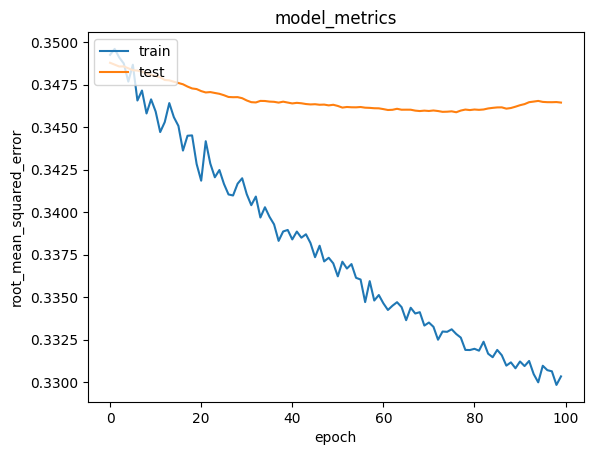

In [83]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
destination_df = destination_new
df = rating.copy()

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
destination_visited_by_user = df[df.User_Id == user_id]

# Mengambil destinasi yang belum pernah dikunjungi
destination_not_visited = destination_df[~destination_df['id'].isin(destination_visited_by_user.Place_Id.values)]['id']
destination_not_visited = list(
    set(destination_not_visited)
    .intersection(set(destination_to_destination_encoded.keys()))
)

# Mengubah ke dalam bentuk array
destination_not_visited = [[destination_to_destination_encoded.get(x)] for x in destination_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_destination_array = np.hstack(
    ([[user_encoder]] * len(destination_not_visited), destination_not_visited)
)

In [85]:
# Mendapatkan rekomendasi
ratings = model.predict(user_destination_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_destination_ids = [
    destination_encoded_to_destination.get(destination_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Destination with high ratings from user')
print('----' * 8)

top_destination_user = (
    destination_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

destination_df_rows = destination_df[destination_df['id'].isin(top_destination_user)]
for row in destination_df_rows.itertuples():
    print(row.name, ':', row.category_city)

print('----' * 8)
print('Top 10 destination recommendation')
print('----' * 8)

recommended_destination = destination_df[destination_df['id'].isin(recommended_destination_ids)]
for row in recommended_destination.itertuples():
    print(row.name, ':', row.category_city)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Showing recommendations for users: 260
Destination with high ratings from user
--------------------------------
Bumi Perkemahan Cibubur : Taman_Hiburan_Jakarta
GunungTangkuban perahu : Cagar_Alam_Bandung
Dago Dreampark : Taman_Hiburan_Bandung
Wisata Batu Kuda : Cagar_Alam_Bandung
Saung Angklung Mang Udjo : Budaya_Bandung
--------------------------------
Top 10 destination recommendation
--------------------------------
Atlantis Water Adventure : Taman_Hiburan_Jakarta
Margasatwa Muara Angke : Cagar_Alam_Jakarta
Taman Spathodea : Taman_Hiburan_Jakarta
Sumur Gumuling : Taman_Hiburan_Yogyakarta
Monumen Yogya Kembali : Budaya_Yogyakarta
Obyek Wisata Goa Kreo : Cagar_Alam_Semarang
Monumen Kapal Selam : Budaya_Surabaya
Taman Keputran : Taman_Hiburan_Surabaya
Taman Ekspresi Dan Perpustakaan : Taman_Hiburan_Surabaya
Keraton Surabaya : Budaya_Surabaya
